In [125]:
import pandas as pd
import panel as pn
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter
import seaborn as sns

pn.extension('tabulator')

import hvplot.pandas

In [126]:
files = ['PrimeLandData1Year.xlsx']

In [127]:
df = pd.DataFrame()
for file in files:
     if file.endswith('.xlsx'):
         df = df.append(pd.read_excel(file, sheet_name="posts"), ignore_index=False) 
df.head()



/var/folders/kp/bgyrqb3s3n19yxcx2cyqppwh0000gn/T/ipykernel_2724/2132965398.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_excel(file, sheet_name="posts"), ignore_index=False)


,company,post_id,created_time,updated_time,message,shares_count,comments_count,reactions_count,like_count,love_count,haha_count,wow_count,sad_count,angry_count
0,Prime Lands,135205517289_10159514146667290,2021-07-20T03:45:28,2021-09-21T03:39:16,"Prime Villas Dalugama, a Project with Definite...",48.0,36,2384,2346,34,2,2,0,0
1,Prime Lands,135205517289_10159514182577290,2021-07-20T04:13:36,2021-08-07T03:52:08,කුරුණෑගල නගරයට විනාඩි 5යි...!!! සියළු නාගරික ප...,24.0,64,2708,2674,33,1,0,0,0
2,Prime Lands,135205517289_10159514731557290,2021-07-20T11:55:29,2021-08-24T08:26:07,"මීගමුවෙන් නියම තැනක් සියලු පහසුකම් සමඟ, 251 බස...",13.0,78,136,131,4,1,0,0,0
3,Prime Lands,135205517289_10159514731812290,2021-07-20T11:55:49,2021-07-24T14:49:01,බිංගිරිය නගරයෙන්ම ව්‍යාපාරික හා නේවාසික බිම් ක...,4.0,2,64,63,1,0,0,0,0
4,Prime Lands,135205517289_10159515017212290,2021-07-20T14:49:19,2021-07-20T14:49:19,Wisdom From Women Leaders in Sri Lanka! Co-Ch...,NaN,0,3,3,0,0,0,0,0


In [128]:

df['shares_count'] = df['shares_count'].replace(np.nan, 0)
df['comments_count'] = df['comments_count'].replace(np.nan, 0)
df['reactions_count'] = df['reactions_count'].replace(np.nan, 0)
df['like_count'] = df['like_count'].replace(np.nan, 0)
df['love_count'] = df['love_count'].replace(np.nan, 0)
df['haha_count'] = df['haha_count'].replace(np.nan, 0)
df['wow_count'] = df['wow_count'].replace(np.nan, 0)
df['sad_count'] = df['sad_count'].replace(np.nan, 0)
df['angry_count'] = df['angry_count'].replace(np.nan, 0)

df['created_time'] = pd.to_datetime(df['created_time'])
df['updated_time'] = pd.to_datetime(df['updated_time'])

df.sort_values(by='created_time', inplace=True)

df.head()



,company,post_id,created_time,updated_time,message,shares_count,comments_count,reactions_count,like_count,love_count,haha_count,wow_count,sad_count,angry_count
0,Prime Lands,135205517289_10159514146667290,2021-07-20 03:45:28,2021-09-21 03:39:16,"Prime Villas Dalugama, a Project with Definite...",48.0,36,2384,2346,34,2,2,0,0
1,Prime Lands,135205517289_10159514182577290,2021-07-20 04:13:36,2021-08-07 03:52:08,කුරුණෑගල නගරයට විනාඩි 5යි...!!! සියළු නාගරික ප...,24.0,64,2708,2674,33,1,0,0,0
2,Prime Lands,135205517289_10159514731557290,2021-07-20 11:55:29,2021-08-24 08:26:07,"මීගමුවෙන් නියම තැනක් සියලු පහසුකම් සමඟ, 251 බස...",13.0,78,136,131,4,1,0,0,0
3,Prime Lands,135205517289_10159514731812290,2021-07-20 11:55:49,2021-07-24 14:49:01,බිංගිරිය නගරයෙන්ම ව්‍යාපාරික හා නේවාසික බිම් ක...,4.0,2,64,63,1,0,0,0,0
4,Prime Lands,135205517289_10159515017212290,2021-07-20 14:49:19,2021-07-20 14:49:19,Wisdom From Women Leaders in Sri Lanka! Co-Ch...,0.0,0,3,3,0,0,0,0,0


In [129]:
average_share_count = df["shares_count"].sum()/len(df.index)
print(f'average share count: {average_share_count}')

average_comments_count = df["comments_count"].sum()/len(df.index)
print(f'average comments count: {average_comments_count}')

average_reactions_count = df["reactions_count"].sum()/len(df.index)
print(f'average reactions count: {average_reactions_count}')

average share count: 17.821538461538463
average comments count: 50.30153846153846
average reactions count: 1250.6707692307693


<AxesSubplot:xlabel='created_time'>

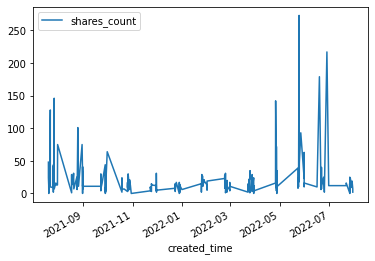

In [130]:
df.reset_index().plot(x ='created_time', y='shares_count', kind = 'line')

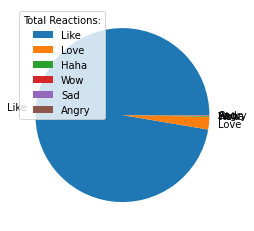

In [131]:
reactions_count =  df['like_count'].sum()
like_count = df['like_count'].sum()
love_count = df['love_count'].sum()
haha_count = df['haha_count'].sum()
wow_count = df['wow_count'].sum()
sad_count = df['sad_count'].sum()
angry_count = df['angry_count'].sum()

y = np.array([like_count, love_count, haha_count, wow_count, sad_count,angry_count])
mylabels = ["Like", "Love", "Haha", "Wow","Sad", "Angry"]

plt.pie(y, labels = mylabels)
plt.legend(title = "Total Reactions:")
plt.show() 




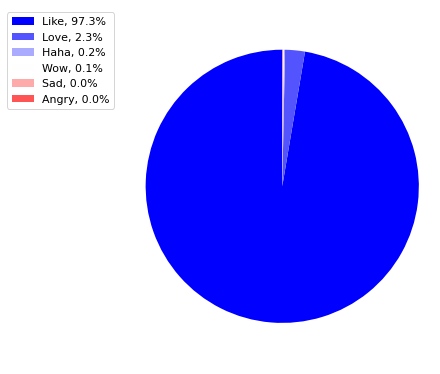

In [132]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(y)) for i in range(len(y))])

_, _ = ax1.pie(y, startangle=90)

ax1.axis('equal')

total = sum(y)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(mylabels, y)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.show()

(0.0, 5.0)

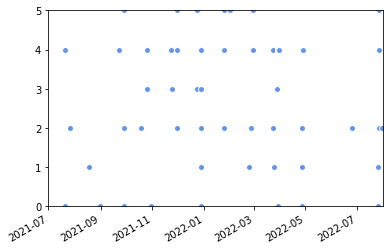

In [133]:
x = df['created_time']
y = df['shares_count']

fig, ax = plt.subplots()
ax.plot_date(x, y, markerfacecolor='CornflowerBlue', markeredgecolor='white')
fig.autofmt_xdate()
ax.set_xlim([dt.date(2021, 7, 1), dt.date(2022, 8, 1)])
ax.set_ylim([0, 5])

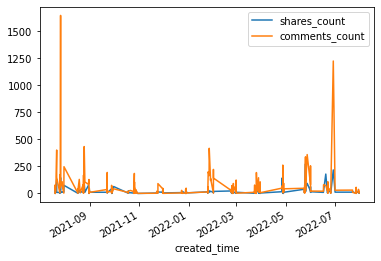

In [134]:
df["created_time"] = pd.to_datetime(df['created_time'])
df.plot(x="created_time", y=["shares_count", "comments_count"])
plt.show()

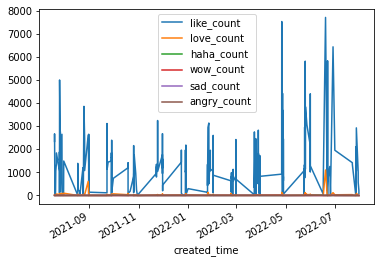

In [135]:
df["created_time"] = pd.to_datetime(df['created_time'])
df.plot(x="created_time", y=["like_count", "love_count", "haha_count", "wow_count", "sad_count","angry_count"])
plt.show()

In [142]:
df_groupby_m_y = df.groupby(df['created_time'].dt.to_period('M')).sum()
df_groupby_m_y


,shares_count,comments_count,reactions_count,like_count,love_count,haha_count,wow_count,sad_count,angry_count
created_time,,,,,,,,,
2021-07,751.0,3613,32254,31284,867,43,28,17,15
2021-08,548.0,1623,28185,26922,1164,45,25,16,13
2021-09,428.0,768,35465,34698,673,46,17,13,18
2021-10,289.0,722,25687,24990,610,48,12,11,16
2021-11,224.0,430,30692,29978,622,31,27,19,15
2021-12,188.0,367,29002,28255,662,40,21,15,9
2022-01,264.0,1730,24929,24194,617,62,24,19,13
2022-02,304.0,684,17918,17454,392,44,17,8,3
2022-03,319.0,1018,26134,25690,368,34,19,13,10


<AxesSubplot:xlabel='created_time'>

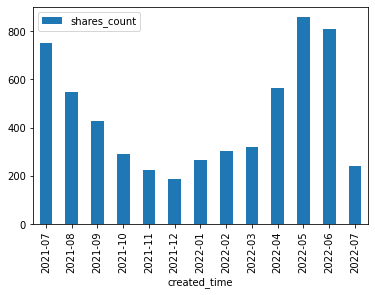

In [143]:
df_groupby_m_y.reset_index().plot(x ='created_time', y='shares_count', kind = 'bar')

<AxesSubplot:xlabel='created_time'>

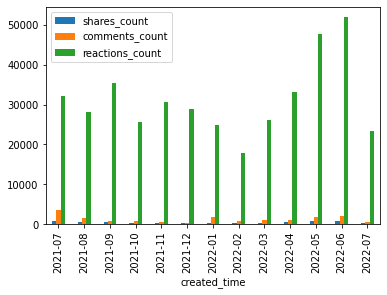

In [144]:
df_groupby_m_y.reset_index().plot(
    x="created_time", y=["shares_count", "comments_count", "reactions_count"], kind="bar"
)


<AxesSubplot:xlabel='created_time'>

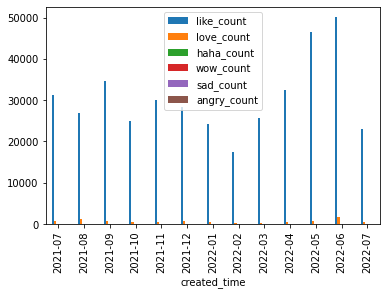

In [145]:
df_groupby_m_y.reset_index().plot(
    x="created_time", y=["like_count", "love_count", "haha_count", "wow_count", "sad_count","angry_count"], kind="bar"
)


In [146]:
df['created_time'].groupby([df.created_time.dt.year, df.created_time.dt.month]).agg('count')

created_time  created_time
2021          7               25
              8               25
              9               25
              10              25
              11              25
              12              25
2022          1               25
              2               25
              3               25
              4               25
              5               25
              6               25
              7               25
Name: created_time, dtype: int64

In [147]:
df_median_m_y = df.groupby(pd.Grouper(key='created_time',freq='M')).median()
df_median_m_y



,shares_count,comments_count,reactions_count,like_count,love_count,haha_count,wow_count,sad_count,angry_count
created_time,,,,,,,,,
2021-07-31,14.0,61.0,1093.0,1066.0,28.0,2.0,1.0,0.0,0.0
2021-08-31,15.0,35.0,1212.0,1169.0,26.0,1.0,0.0,0.0,0.0
2021-09-30,12.0,17.0,1462.0,1437.0,25.0,1.0,0.0,0.0,1.0
2021-10-31,9.0,17.0,967.0,949.0,23.0,1.0,0.0,0.0,0.0
2021-11-30,8.0,11.0,1132.0,1110.0,20.0,1.0,1.0,0.0,0.0
2021-12-31,6.0,9.0,1180.0,1145.0,27.0,2.0,1.0,0.0,0.0
2022-01-31,7.0,16.0,763.0,743.0,19.0,1.0,1.0,1.0,0.0
2022-02-28,11.0,15.0,684.0,669.0,13.0,1.0,1.0,0.0,0.0
2022-03-31,12.0,25.0,853.0,830.0,14.0,1.0,0.0,0.0,0.0


In [148]:
average_share_count = df["shares_count"].sum()/len(df.index)
print(f'average share count: {average_share_count}')

average_comments_count = df["comments_count"].sum()/len(df.index)
print(f'average comments count: {average_comments_count}')

average_reactions_count = df["reactions_count"].sum()/len(df.index)
print(f'average reactions count: {average_reactions_count}')

average share count: 17.821538461538463
average comments count: 50.30153846153846
average reactions count: 1250.6707692307693


In [ ]:
df.groupby(pd.Grouper(key='created_time',freq='M')).apply(lambda x: x['shares_count'].sum()/len(x))

created_time
2021-07-31    30.04
2021-08-31    21.92
2021-09-30    17.12
2021-10-31    11.56
2021-11-30     8.96
2021-12-31     7.52
2022-01-31    10.56
2022-02-28    12.16
2022-03-31    12.76
2022-04-30    22.64
2022-05-31    34.36
2022-06-30    32.40
2022-07-31     9.68
Freq: M, dtype: float64

In [141]:
df_average_monthly_stats = df.groupby(df['created_time'].dt.to_period('M')).mean().round(2).reset_index()
df_average_monthly_stats

,created_time,shares_count,comments_count,reactions_count,like_count,love_count,haha_count,wow_count,sad_count,angry_count
0,2021-07,30.04,144.52,1290.16,1251.36,34.68,1.72,1.12,0.68,0.60
1,2021-08,21.92,64.92,1127.40,1076.88,46.56,1.80,1.00,0.64,0.52
2,2021-09,17.12,30.72,1418.60,1387.92,26.92,1.84,0.68,0.52,0.72
3,2021-10,11.56,28.88,1027.48,999.60,24.40,1.92,0.48,0.44,0.64
4,2021-11,8.96,17.20,1227.68,1199.12,24.88,1.24,1.08,0.76,0.60
5,2021-12,7.52,14.68,1160.08,1130.20,26.48,1.60,0.84,0.60,0.36
6,2022-01,10.56,69.20,997.16,967.76,24.68,2.48,0.96,0.76,0.52
7,2022-02,12.16,27.36,716.72,698.16,15.68,1.76,0.68,0.32,0.12
8,2022-03,12.76,40.72,1045.36,1027.60,14.72,1.36,0.76,0.52,0.40
9,2022-04,22.64,42.52,1326.96,1300.16,23.00,1.60,1.36,0.28,0.56


<AxesSubplot:xlabel='created_time'>

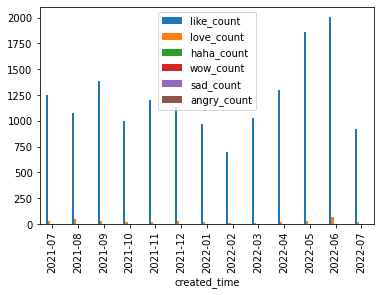

In [139]:
df_average_monthly_stats.reset_index().plot(
    x="created_time", y=["like_count", "love_count", "haha_count", "wow_count", "sad_count","angry_count"], kind="bar"
)